In [1]:
from pathlib import Path
import os
import glob

import numpy as np
from PIL import Image
import imgaug.augmentables as ia
from tqdm import tqdm_notebook

from datasets.sroie.utils.cropper import crop_image, polys2boxes

In [2]:
raw_data_folder = 'SROIE/task1/'
proc_data_folder = 'SROIE/task1_proc/'

In [3]:
## images
image_files = glob.glob(os.path.join(raw_data_folder, '*.jpg'))

In [69]:
for img_file in tqdm_notebook(image_files):
#     img_file = os.path.join(raw_data_folder, 'X51005361900.jpg')
    annotation_path = img_file.replace('.jpg', '.txt')
    
    
    image_name = img_file.split('/')[-1]
    new_image_path = os.path.join(proc_data_folder, image_name)
    new_anns_path = new_image_path.replace('.jpg', '.txt')
    
    if os.path.exists(new_anns_path):
        continue

    image = Image.open(img_file).convert('RGB')
    try:
        txt_annotations = open(annotation_path).read().split('\n')
    except FileNotFoundError:
        continue
    polys = []
    texts = []
    for row in txt_annotations[:-1]:
        anns = row.split(',', 8)
        poly = anns[:-1]
        polys.append(poly)
        texts.append(anns[-1])
        
    polys = np.array(polys, dtype=np.float32).reshape(-1, 4, 2)
    cropped_image, cropped_polys, texts = crop_image(image, img_file, polygons=polys, texts=texts)[:3]
    
    flat_polys = cropped_polys.reshape(-1, 8).astype(np.int64).astype('str').tolist()
    lines = []
    for poly, text in zip(flat_polys, texts):
        line = ','.join(poly + [text])
        lines.append(line)
    annotation = '\n'.join(lines)+'\n'

    
    cropped_image.save(new_image_path)
    with open(new_anns_path, 'w') as f:
        f.write(annotation)
    
#     break

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


### discarding (xx) polygon(s) in image #SROIE/task1/X51006414712.jpg
### discarding (xx) polygon(s) in image #SROIE/task1/X51005442397.jpg



In [36]:
np_img = np.array(cropped_image)
bboxes = polys2boxes(cropped_polys)
bboxes = ia.BoundingBoxesOnImage.from_xyxy_array(bboxes, shape=np_img.shape)

In [38]:
img_drawn = bboxes.draw_on_image(np_img)

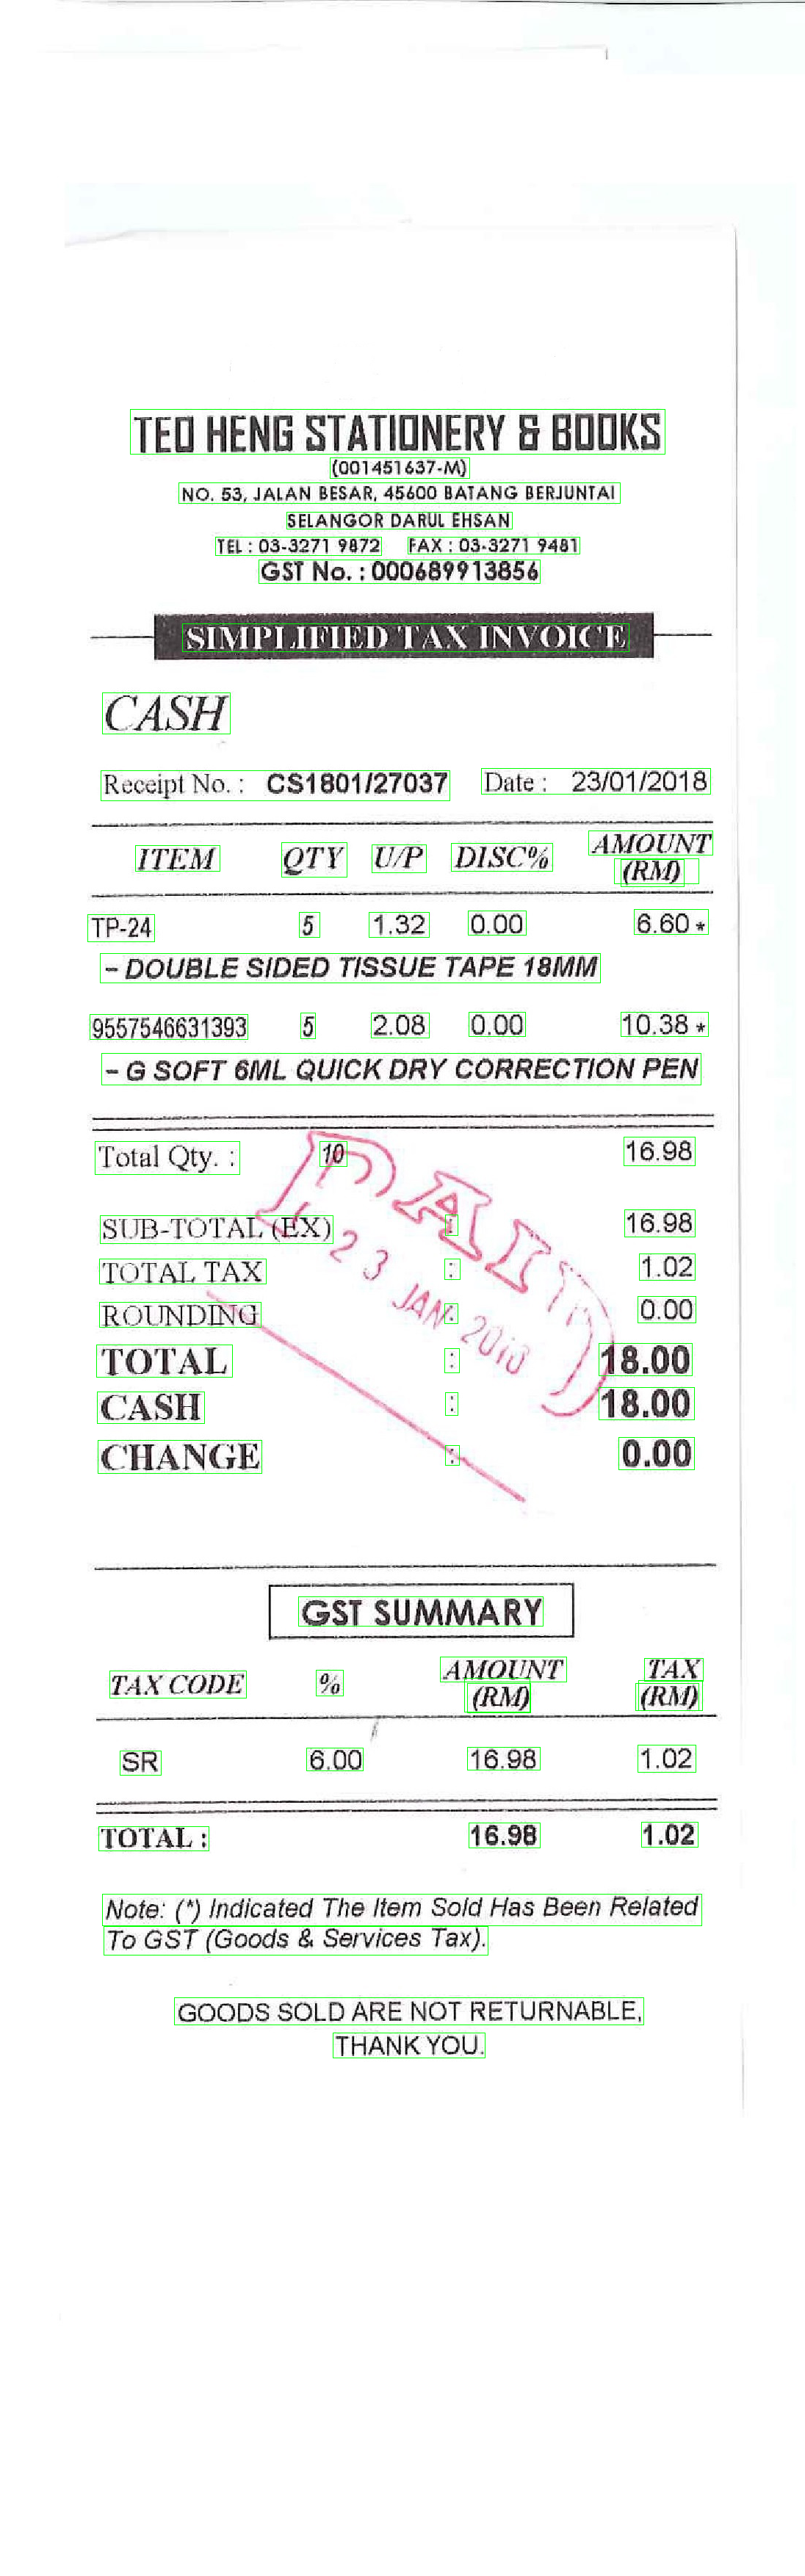

In [39]:
Image.fromarray(img_drawn)

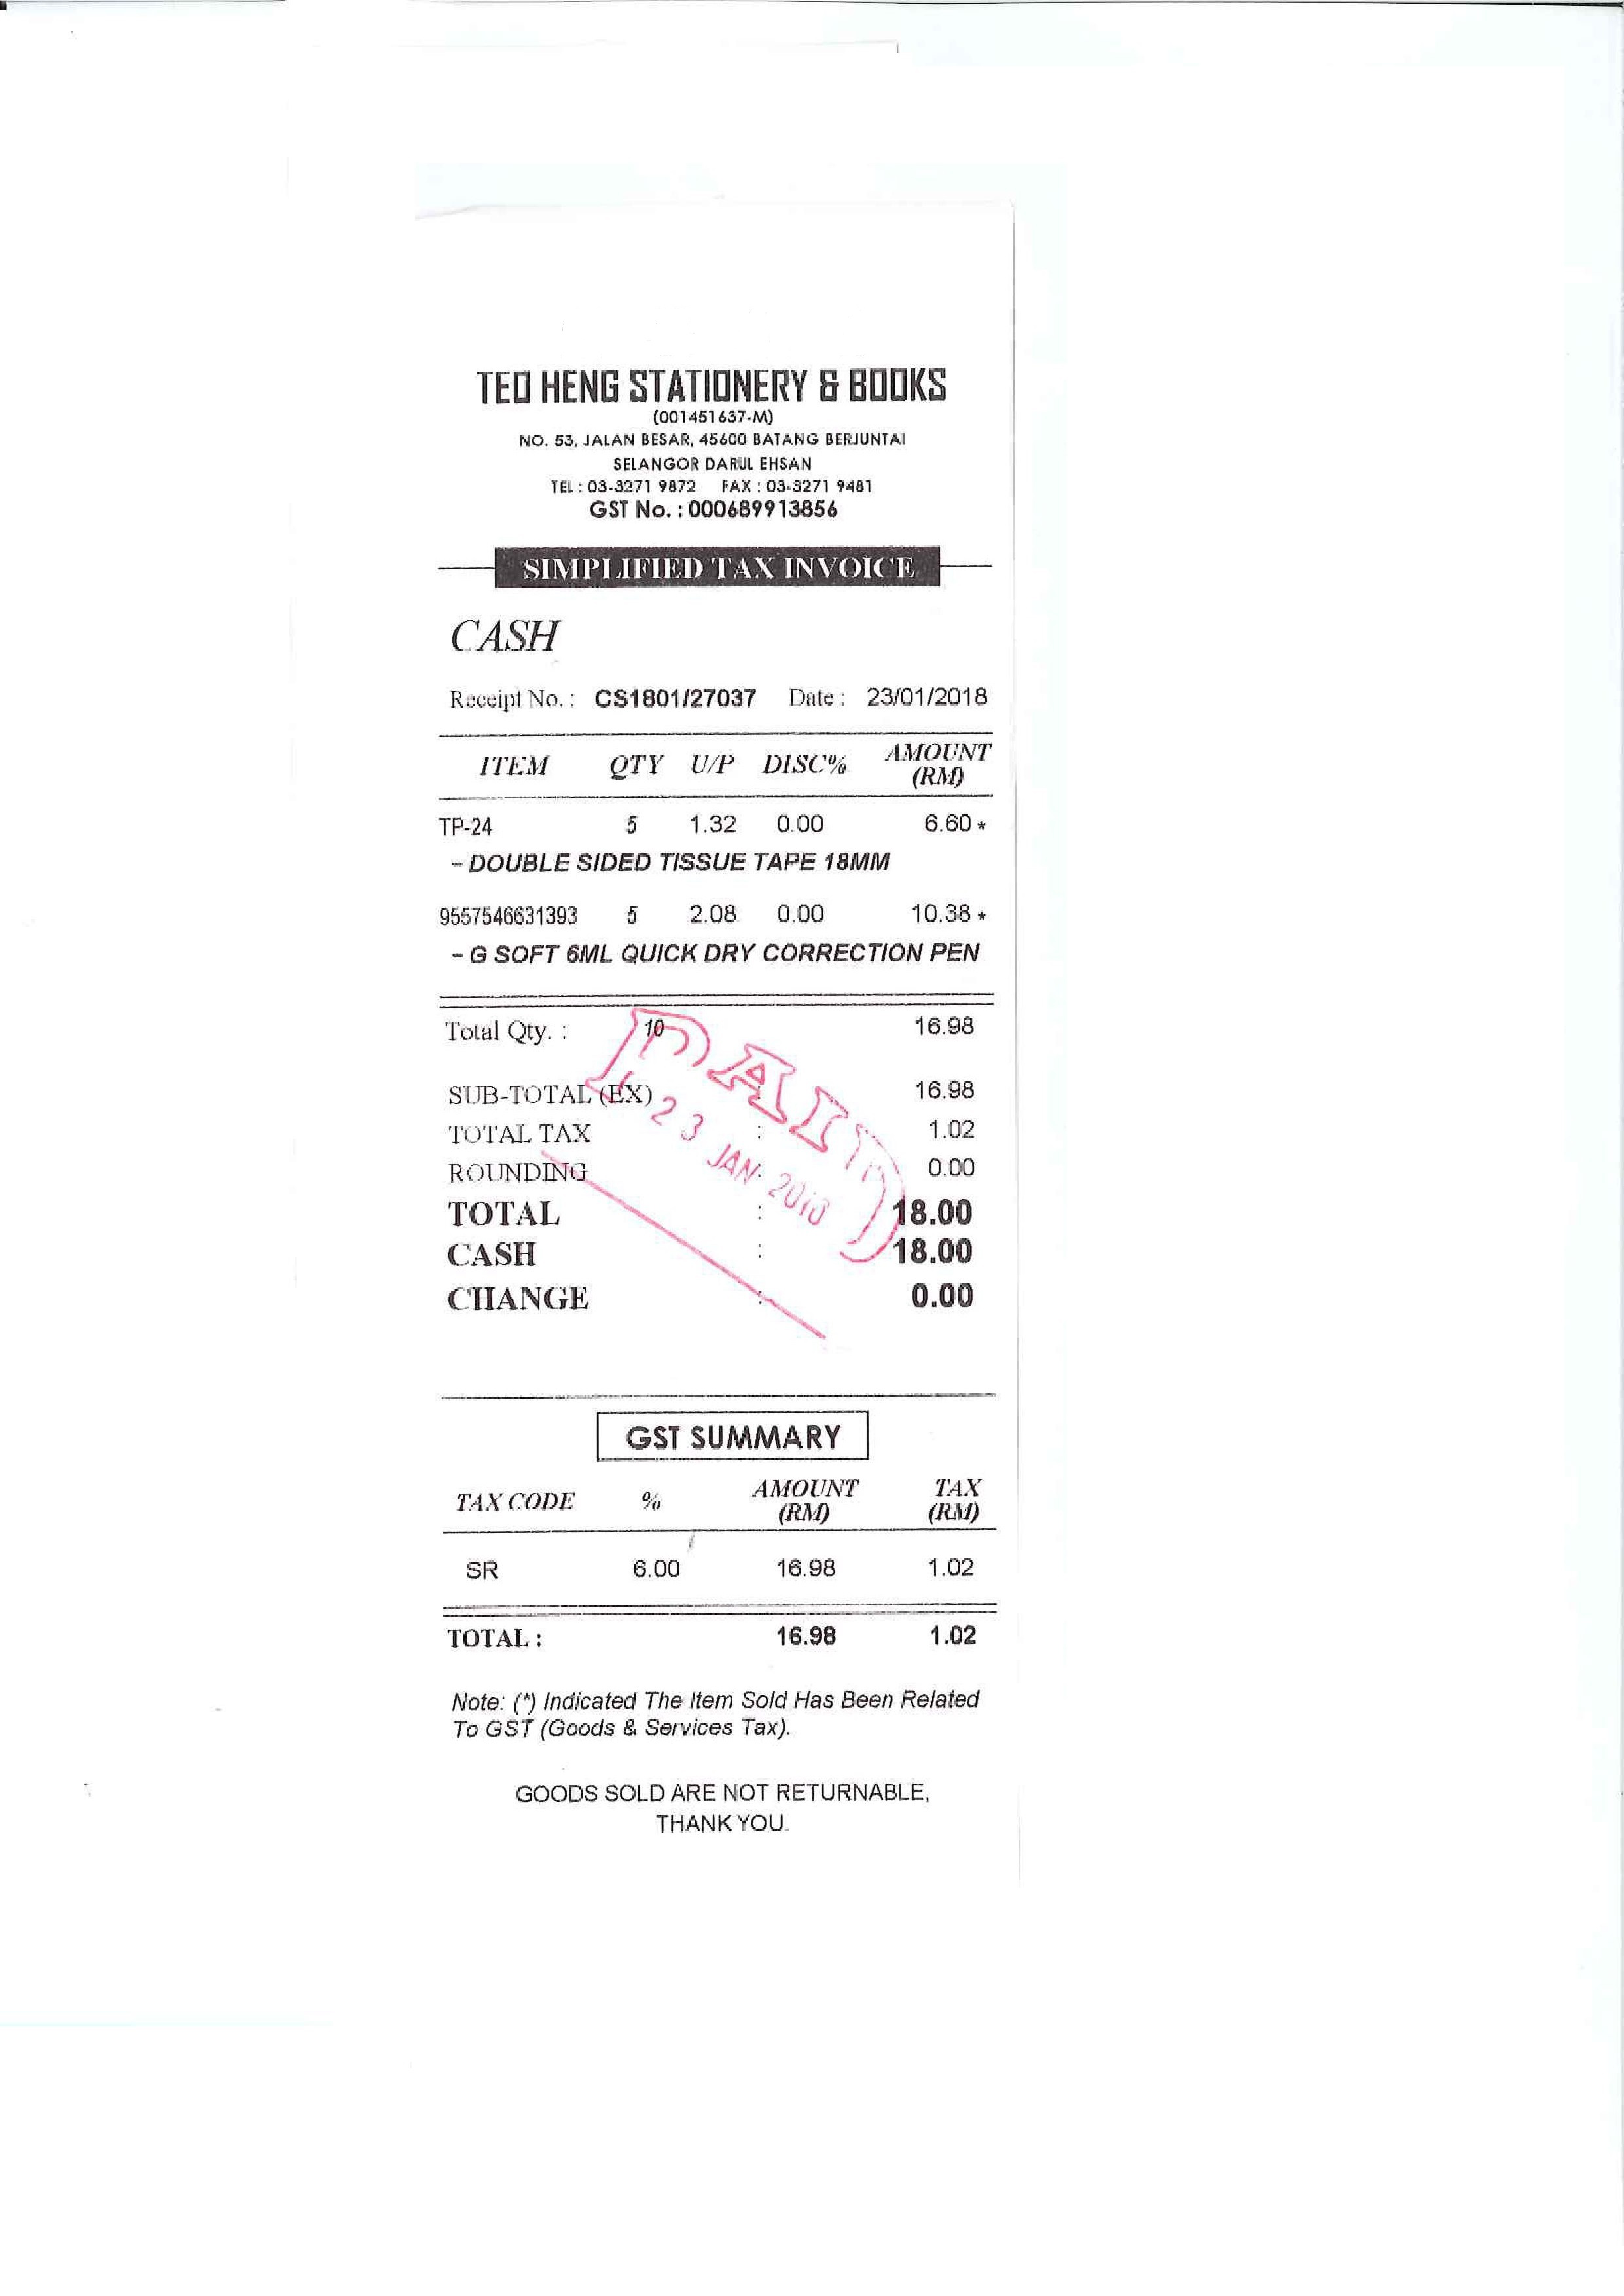

In [40]:
image